# A Text Mining Approach to Analyze The Cyber Security Related Articles

## PART-4: Data Visualization

__1-) Visualization of Basic Information__

    1.1) Article Numbers by Years
    1.2) Total Award Amount by Years
    1.3) Lenght of Abstracts by Years
    1.4) Award Duration by Years
    1.5) Article Numbers By Instutions
    1.6) Article Numbers By State
    1.7) Article Numbers By Program Officers
    1.8) Article Numbers By Investigators

__2-) Visualization of Derived Information__

    2.1) Top Common Words in Abstracts
    2.2) Top Common IT/Cyber Terms in Abstracts
    2.3) First Usage of IT/Cyber Terms in Abstracts
    2.4) Changes of IT/Cyber Terms Usage in Abstracts
    2.5) Compare Of Some IT/Cyber Terms Usage by Yearly

__Importing of Required Libraries__

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


import warnings
warnings.filterwarnings("ignore")

__Loading Data__

As mentioned Part-2 that pandas parquet options doesn't support timedelta type. So we need to use __fastparquet__ option, to keep the timedelta type format.

In [2]:
df_sum=pd.read_parquet('data/df_sum_parquet.gzip',engine='fastparquet')
df_investigator_cyber=pd.read_parquet('data/df_investigator_cyber_parque.gzip',engine='fastparquet')
df_sum2=pd.read_csv('data/df_sum_clustering.csv', sep=';').drop(['Unnamed: 0'],axis=1)

df_FreqDist50_yearly=pd.read_csv('data/FreqDist50_yearly.csv', sep=';',index_col='Unnamed: 0')
df_FreqDist50_yearly.columns = df_FreqDist50_yearly.columns.astype(int) # Define column type as int

df_FreqDist= pd.read_csv('data/FreqDist.csv', sep=';', index_col='Words')
df_FreqDist_IT_terms= pd.read_csv('data/df_FreqDist_IT_terms.csv', sep=';',index_col='Words')
df_FreqDist_IT_terms_yearly_tot= pd.read_csv('data/df_FreqDist_IT_terms_yearly_tot.csv', sep=';',index_col='Words')
df_FreqDist_IT_terms_yearly_tot.columns = df_FreqDist_IT_terms_yearly_tot.columns.astype(int) # Define column type as int

## 1-) Visualization of Basic Information

__1.1) Article Numbers by Years__

Remember! The data of NSF starts from 1900. Total 189 article' AwardEffective Date is 01-01-1900. The first paper's date which is related with cyber is 15-07-1985.

In [3]:
df_sum.groupby('Year')['AwardID'].count().head(3)

Year
1985    1
1986    1
1987    4
Name: AwardID, dtype: int64

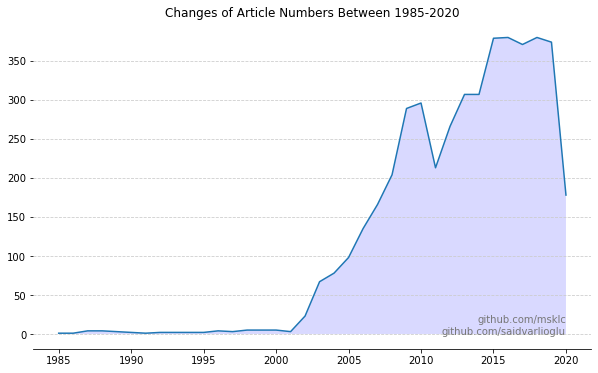

In [4]:
plt.figure(figsize=(10,6))

plt.plot(df_sum.groupby(by='Year')['AwardID'].count().index,df_sum.groupby(by='Year')['AwardID'].count())

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame

# Fill the area below the line
plt.gca().fill_between(df_sum.groupby(by='Year')['AwardID'].count().index,
                       df_sum.groupby(by='Year')['AwardID'].count(), 
                       np.zeros(len(df_sum.groupby(by='Year')['AwardID'].count())), 
                       facecolor='blue', alpha=0.15)
#add grid for y-axis
plt.grid(axis='y', color='#CCCCCC', linestyle='--')
        
#title
plt.title('Changes of Article Numbers Between 1985-2020')

#add signature :)
plt.text(2020, 0, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#save and show
plt.savefig('plots/NSF_PaperNum_Yearly.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__1.2) Total Award Amount by Years__

The total amount is Million Dollar

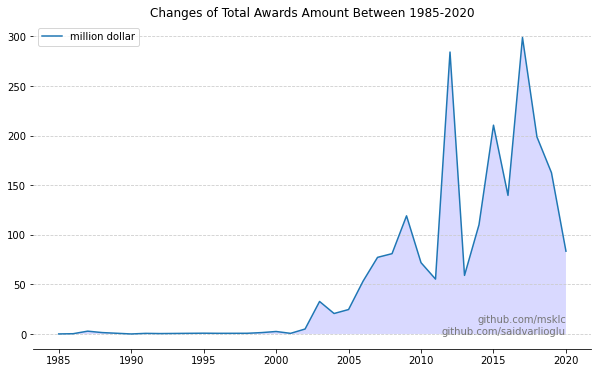

In [5]:
plt.figure(figsize=(10,6))

plt.plot(df_sum.groupby('Year')['AwardAmount_Million'].sum().index,
         df_sum.groupby('Year')['AwardAmount_Million'].sum(),
        label='million dollar')

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame

# Fill the area below the line
plt.gca().fill_between(df_sum.groupby('Year')['AwardAmount_Million'].sum().index,
                       df_sum.groupby('Year')['AwardAmount_Million'].sum(), 
                       np.zeros(len(df_sum.groupby('Year')['AwardAmount_Million'].sum())), 
                       facecolor='blue', alpha=0.15)
#add grid for y-axis
plt.grid(axis='y', color='#CCCCCC', linestyle='--')
        
#title
plt.title('Changes of Total Awards Amount Between 1985-2020')

#add signature :)
plt.text(2020, 0, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#add label
plt.legend(loc="upper left")

#save and show
plt.savefig('plots/NSF_AwardAmount_Yearly.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__1.3) Lenght of Abstracts by Years__

In [6]:
print('The longest abstract (AbstractID={}) has {} words in {}'.format(df_sum.iloc[df_sum['Abstract_Lenght'].idxmax(),]['AwardID'],
                                                                    df_sum['Abstract_Lenght'].max(),
                                                                    df_sum.iloc[df_sum['Abstract_Lenght'].idxmax(),]['Year']))
print('The shortest abstract (AbstractID={}) has {} words in {}'.format(df_sum.iloc[df_sum['Abstract_Lenght'].idxmin(),]['AwardID'],
                                                                    df_sum['Abstract_Lenght'].min(),
                                                                    df_sum.iloc[df_sum['Abstract_Lenght'].idxmin(),]['Year']))
print('The average word count of abstracts is {}'.format(df_sum['Abstract_Lenght'].mean().round(2)))
df_sum.groupby('Year')['Abstract_Lenght'].sum().round(0).head(3)


The longest abstract (AbstractID=1664018) has 7973 words in 2017
The shortest abstract (AbstractID=1255247) has 204 words in 2012
The average word count of abstracts is 2490.36


Year
1985    1303
1986    1245
1987    7277
Name: Abstract_Lenght, dtype: int64

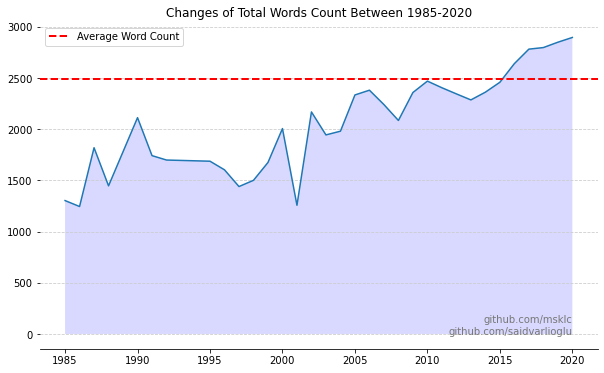

In [7]:
plt.figure(figsize=(10,6))

plt.plot(df_sum.groupby('Year')['Abstract_Lenght'].mean().index,
         df_sum.groupby('Year')['Abstract_Lenght'].mean())

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame

# Fill the area below the line
plt.gca().fill_between(df_sum.groupby('Year')['Abstract_Lenght'].mean().index,
                       df_sum.groupby('Year')['Abstract_Lenght'].mean(), 
                       np.zeros(len(df_sum.groupby('Year')['AwardAmount_Million'].sum())), 
                       facecolor='blue', alpha=0.15)
#add grid for y-axis
plt.grid(axis='y', color='#CCCCCC', linestyle='--')

#add line about mean
plt.axhline(df_sum['Abstract_Lenght'].mean(), color='r',linestyle='--',linewidth=2,label='Average Word Count')

#title
plt.title('Changes of Total Words Count Between 1985-2020')

#add label
plt.legend(loc="upper left")

#add signature :)
plt.text(2020, 0, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#save and show
plt.savefig('plots/NSF_AbstractLenght_Yearly.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__THE AVERAGE LINE SEEN UNLOGICAL?__

In this __line plot__, we calculated the average word count of abstracts yearly. So, with this plot, we can't understand the total article numbers yearly. And the comparison of the average word count of abstracts can't demonstrate the real situation exactly. 

To solve the problem, we should prefer the right plotting type, like __scatter plot__. With this plotting, we can see the words count of every article yearly and understood that the average word count is logical.  

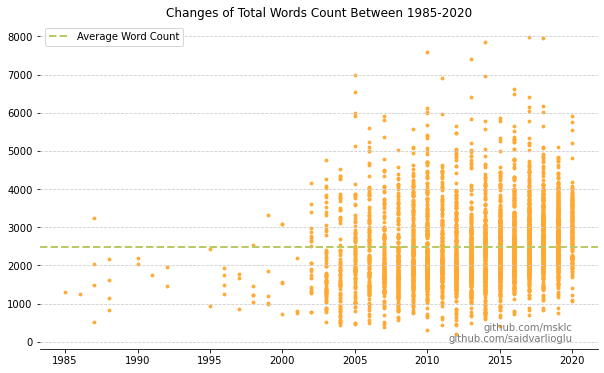

In [8]:
plt.figure(figsize=(10,6))

plt.scatter(df_sum['Year'],df_sum['Abstract_Lenght'], color='#FFA931',s=8)

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame

#add grid for y-axis
plt.grid(axis='y', color='#CCCCCC', linestyle='--')

#add line about mean
plt.axhline(df_sum['Abstract_Lenght'].mean(), color='#BAC964',linestyle='--',linewidth=2,label='Average Word Count')

#title
plt.title('Changes of Total Words Count Between 1985-2020')

#add label
plt.legend(loc="upper left")

#add signature :)
plt.text(2020, 0, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#save and show
plt.savefig('plots/NSF_AbstractLenght_Yearly_Scatter.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__1.4) Award Duration by Years__

In [9]:
df_sum['Award_Duration'].sort_values(ascending=False).head(2)

136    4900 days
1016   4017 days
Name: Award_Duration, dtype: timedelta64[ns]

In [10]:
print('The minumum award duration is: {} days'.format(df_sum['Award_Duration'].min().days))
print('The maximum award duration is: {} days'.format(df_sum['Award_Duration'].max().days))
print('The average award duration is: {} days'.format(df_sum['Award_Duration'].mean().days))

The minumum award duration is: 29 days
The maximum award duration is: 4900 days
The average award duration is: 1262 days


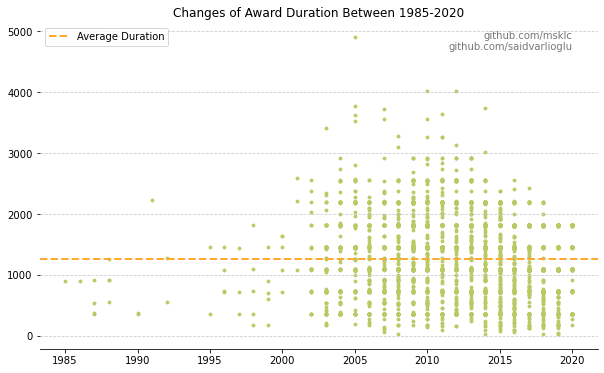

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df_sum['Year'],df_sum['Award_Duration'].dt.days, color='#BAC964', s=8)

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame

#add grid for y-axis
plt.grid(axis='y', color='#CCCCCC', linestyle='--')

#add line about mean
plt.axhline(df_sum['Award_Duration'].dt.days.mean(), color='#FFA931',linestyle='--',linewidth=2,label='Average Duration')

#title
plt.title('Changes of Award Duration Between 1985-2020')

#add label
plt.legend(loc="upper left")

#add signature :)
plt.text(2020, 4700, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#save and show
plt.savefig('plots/NSF_AwardDuration_Yearly_Scatter.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__1.5) Article Numbers By Instutions__

In [12]:
print('Totally {} Institutions participate in preparing cyber related articles'.format(df_sum['Institution_Name'].nunique()))

#Create New DataFrame
df_institutions=df_sum.groupby(['Institution_Name']).count()['AwardID'].sort_values(ascending=False).to_frame()
df_institutions.rename(columns={'AwardID':'TotalAward'},inplace=True)
df_institutions.reset_index(level=0, inplace=True)
df_institutions.head(3)

Totally 688 Institutions participate in preparing cyber related articles


Institution_Name  TotalAward
0  University of Illinois at Urbana-Champaign         102
1          University of California-San Diego          85
2            University of Michigan Ann Arbor          85

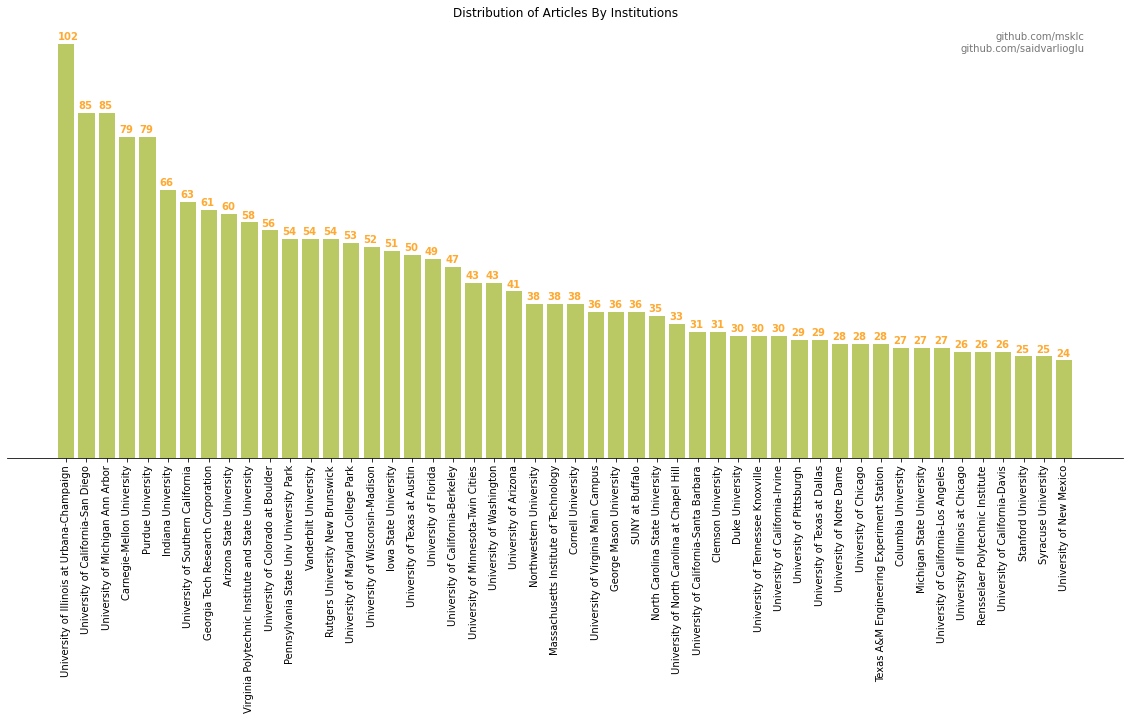

In [13]:
plt.figure(figsize=(20,8))

plt.bar(df_institutions['Institution_Name'][:50], df_institutions['TotalAward'][:50], align='center', color='#BAC964')

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
plt.yticks([]) #disable ythicks

#Add the values of data to bar plot
for i in range(50):
    plt.text(i-0.4, df_institutions['TotalAward'][i]+1, df_institutions['TotalAward'][i],color='#FFA931',weight='bold')

#title
plt.title('Distribution of Articles By Institutions')

#add signature :)
plt.text(50, 100, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')


#Rotate the xticks
plt.xticks(rotation=90)

#save and show
plt.savefig('plots/NSF_Award_Institutions.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__1.6) Article Numbers By State__

In [14]:
print('Totally {} Institutions from {} different state participate in preparing cyber related articles'.format(df_sum['Institution_Name'].nunique(),
                                                                                                              df_sum['Institution_StateName'].nunique()))
#Create New DataFrame
StateName_list=list(df_sum.groupby('Institution_StateName')['AwardID'].count().sort_values(ascending=False).index)
TotalAwardNum_list=list(df_sum.groupby('Institution_StateName')['AwardID'].count().sort_values(ascending=False))
df_state=pd.DataFrame({'StateName':StateName_list,'TotalAwardNum':TotalAwardNum_list})
df_state.head(3)

Totally 688 Institutions from 53 different state participate in preparing cyber related articles


StateName  TotalAwardNum
0  California            510
1    New York            314
2       Texas            266

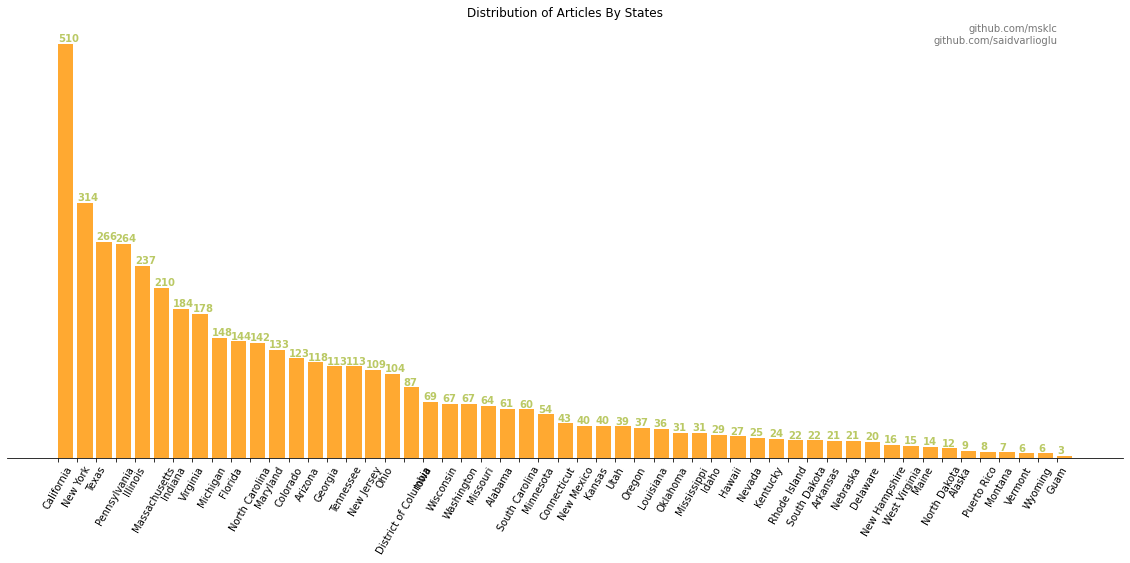

In [15]:
plt.figure(figsize=(20,8))

plt.bar(df_state['StateName'], df_state['TotalAwardNum'], align='edge', color='#FFA931')

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
plt.yticks([]) #disable ythicks

#Add the values of data to bar plot
for i in range(len(df_state['TotalAwardNum'])):
    plt.text(i, df_state['TotalAwardNum'][i]+2, df_state['TotalAwardNum'][i],color='#BAC964',weight='bold')

#title
plt.title('Distribution of Articles By States')

#add signature :)
plt.text(52, 510, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')


#Rotate the xticks
plt.xticks(rotation=60)

#save and show
plt.savefig('plots/NSF_Award_States.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

In [16]:
import folium

# geojson file
us_state_geo = r'data\US_states_geojson.json' 

# create map
usa_map = folium.Map(location=[45, -100], zoom_start=3)

# generate choropleth map
usa_map.choropleth(
    geo_data=us_state_geo,
    data=df_state,
    columns=['StateName', 'TotalAwardNum'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Density Of Article Numbers By State',
    reset=True)

# display and save map
usa_map.save(r'plots\NSF_Award_States_map.html')
usa_map

__1.7) Article Numbers By Program Officers__

In [17]:
print('Totally {} program officers participate in preparing cyber related articles'.format(df_sum['ProgramOfficer'].nunique()))

#Create New DataFrame
df_ProgramOfficer=df_sum.groupby('ProgramOfficer')['AwardID'].count().sort_values(ascending=False).to_frame()
df_ProgramOfficer.rename(columns={'AwardID':'TotalAward'},inplace=True)
df_ProgramOfficer.reset_index(level=0, inplace=True)
df_ProgramOfficer.head(3)

Totally 773 program officers participate in preparing cyber related articles


ProgramOfficer  TotalAward
0  Victor Piotrowski         233
1       David Corman         165
2     Kevin Thompson         158

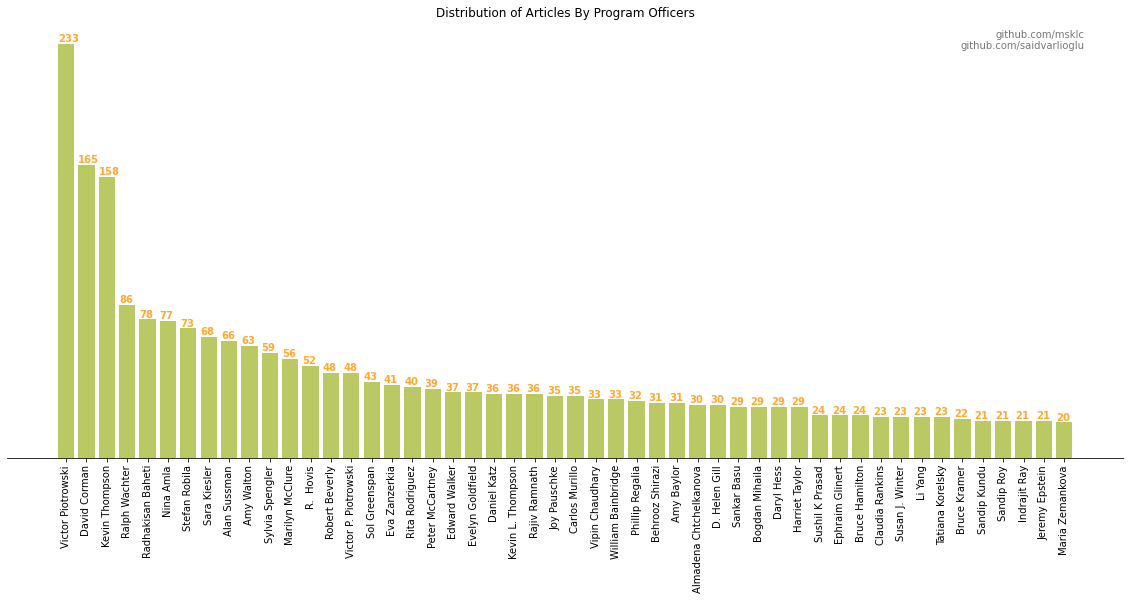

In [18]:
plt.figure(figsize=(20,8))

plt.bar(df_ProgramOfficer['ProgramOfficer'][:50], df_ProgramOfficer['TotalAward'][:50], align='center', color='#BAC964')

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
plt.yticks([]) #disable ythicks

#Add the values of data to bar plot
for i in range(50):
    plt.text(i-0.4, df_ProgramOfficer['TotalAward'][i]+1, df_ProgramOfficer['TotalAward'][i],color='#FFA931',weight='bold')

#title
plt.title('Distribution of Articles By Program Officers')

#add signature :)
plt.text(50, 230, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#Rotate the xticks
plt.xticks(rotation=90)

#save and show
plt.savefig('plots/NSF_Award_ProgramOfficers.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__1.8) Article Numbers By Investigators__

In [19]:
print('Totally {} investigators participate in preparing cyber related articles'.format(df_investigator_cyber['Investigator_EmailAddress'].nunique()))

df_investigator_cyber.replace(to_replace=['None'], value=np.nan, inplace=True)
df_investigator_cyber.dropna(subset=['Investigator_FirstName'], inplace=True)
df_investigator_recap=df_investigator_cyber.groupby(['Investigator_FirstName','Investigator_LastName'])['AwardID'].count().sort_values(ascending=False).to_frame()
df_investigator_recap.reset_index(inplace=True)
df_investigator_recap['Investigator_FullName']=df_investigator_recap['Investigator_FirstName']+' '+df_investigator_recap['Investigator_LastName']
df_investigator_recap.rename(columns={'AwardID':'TotalAward'},inplace=True)

df_investigator_recap.head(3)

Totally 7669 investigators participate in preparing cyber related articles


Investigator_FirstName Investigator_LastName  TotalAward  \
0                Frankie                  King          17   
1                    Ewa               Deelman          14   
2               Shantenu                   Jha          13   

  Investigator_FullName  
0          Frankie King  
1           Ewa Deelman  
2          Shantenu Jha

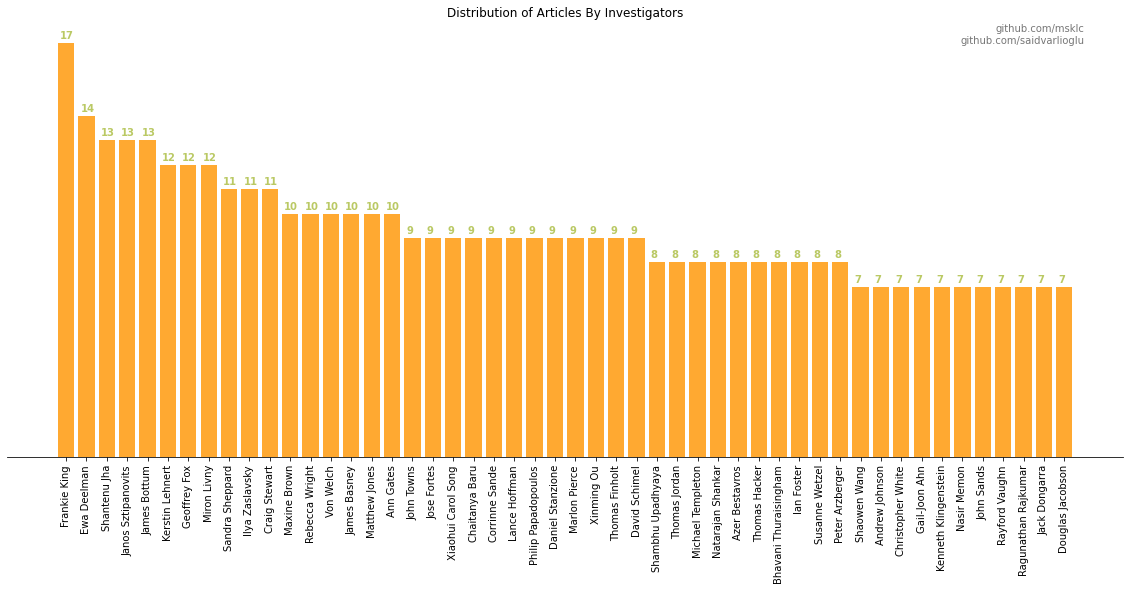

In [20]:
plt.figure(figsize=(20,8))

plt.bar(df_investigator_recap['Investigator_FullName'][:50], df_investigator_recap['TotalAward'][:50], align='center', color='#FFA931')

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
plt.yticks([]) #disable ythicks

#Add the values of data to bar plot
for i in range(50):
    plt.text(i-0.3, df_investigator_recap['TotalAward'][i]+0.2, df_investigator_recap['TotalAward'][i],color='#BAC964',weight='bold')

#title
plt.title('Distribution of Articles By Investigators')

#add signature :)
plt.text(50, 17, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')


#Rotate the xticks
plt.xticks(rotation=90)

#save and show
plt.savefig('plots/NSF_Award_Investigators.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

## 2-) Visualization of Derived Information

The data of this part was derived from Abstracts of articles' by text mining techniques, which is explained in Part-3 detail.

__2.1) Top Common Words in Abstracts__ 

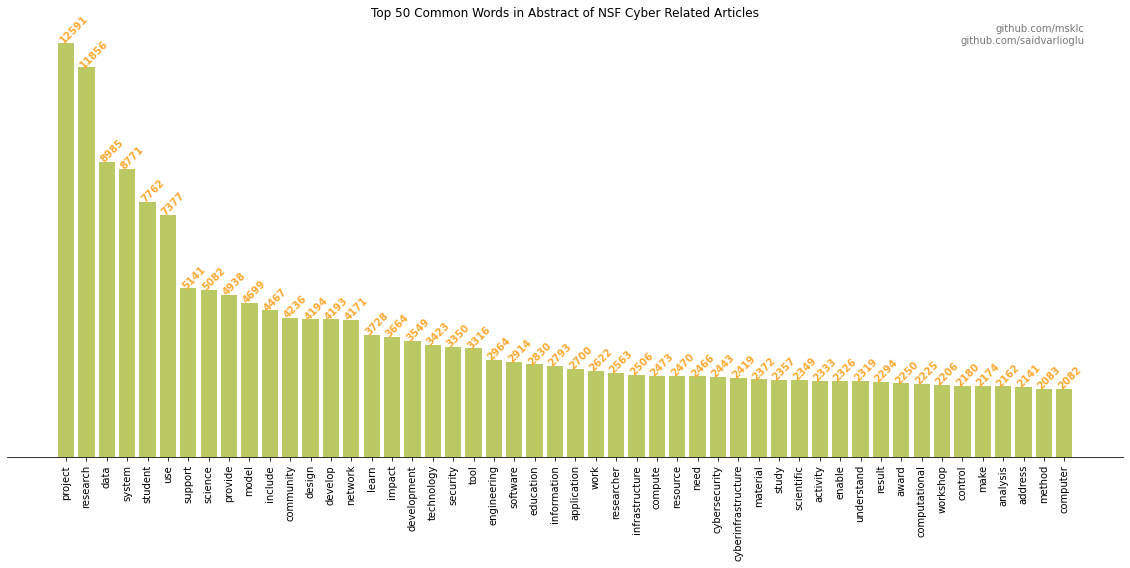

In [21]:
plt.figure(figsize=(20,8))

plt.bar(df_FreqDist.index[:50], df_FreqDist['Count'][:50], align='center', color='#BAC964')

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
plt.yticks([]) #disable ythicks

#Add the values of data to bar plot
for i in range(50):
    plt.text(i-0.4, df_FreqDist['Count'][i]+1, df_FreqDist['Count'][i],color='#FFA931',weight='bold',rotation=45)

#title
plt.title("Top 50 Common Words in Abstract of NSF Cyber Related Articles")

#add signature :)
plt.text(50, 12600, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#Rotate the xticks
plt.xticks(rotation=90)

#save and show
plt.savefig('plots/NSF_TopCommonWords.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__2.2) Top Common IT/Cyber Terms in Abstracts__ 

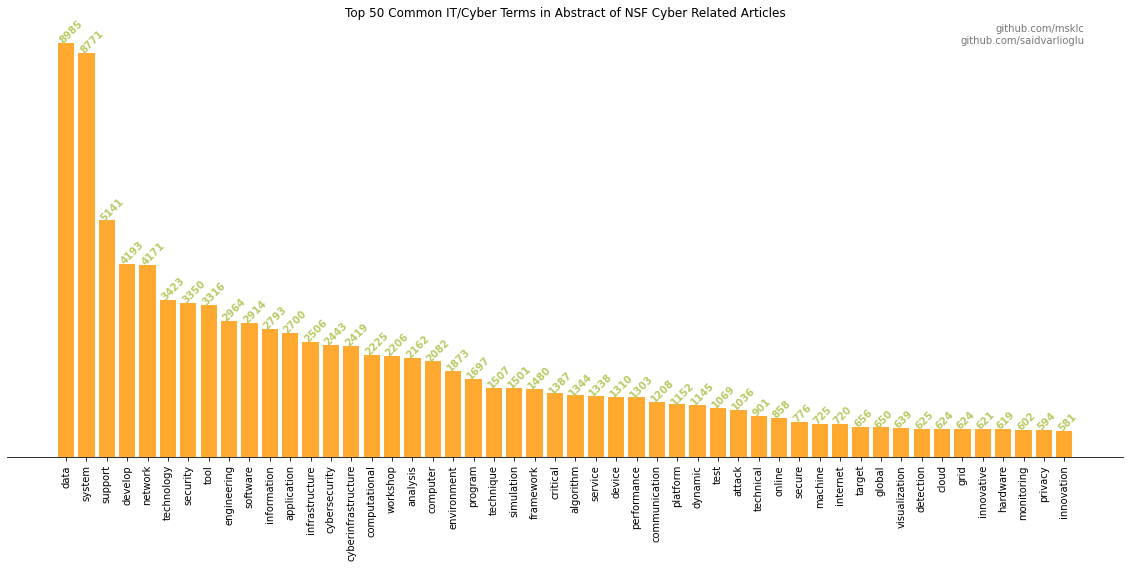

In [22]:
plt.figure(figsize=(20,8))

plt.bar(df_FreqDist_IT_terms.index[:50], df_FreqDist_IT_terms['Count'][:50], align='center', color='#FFA931')

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
plt.yticks([]) #disable ythicks

#Add the values of data to bar plot
for i in range(50):
    plt.text(i-0.4, df_FreqDist_IT_terms['Count'][i]+1, df_FreqDist_IT_terms['Count'][i],color='#BAC964',weight='bold',rotation=45)

#title
plt.title("Top 50 Common IT/Cyber Terms in Abstract of NSF Cyber Related Articles")

#add signature :)
plt.text(50, 8990, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#Rotate the xticks
plt.xticks(rotation=90)

#save and show
plt.savefig('plots/NSF_TopCommon_ITCyber_Terms.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__2.3) First Usage of IT/Cyber Terms in Abstracts__ 

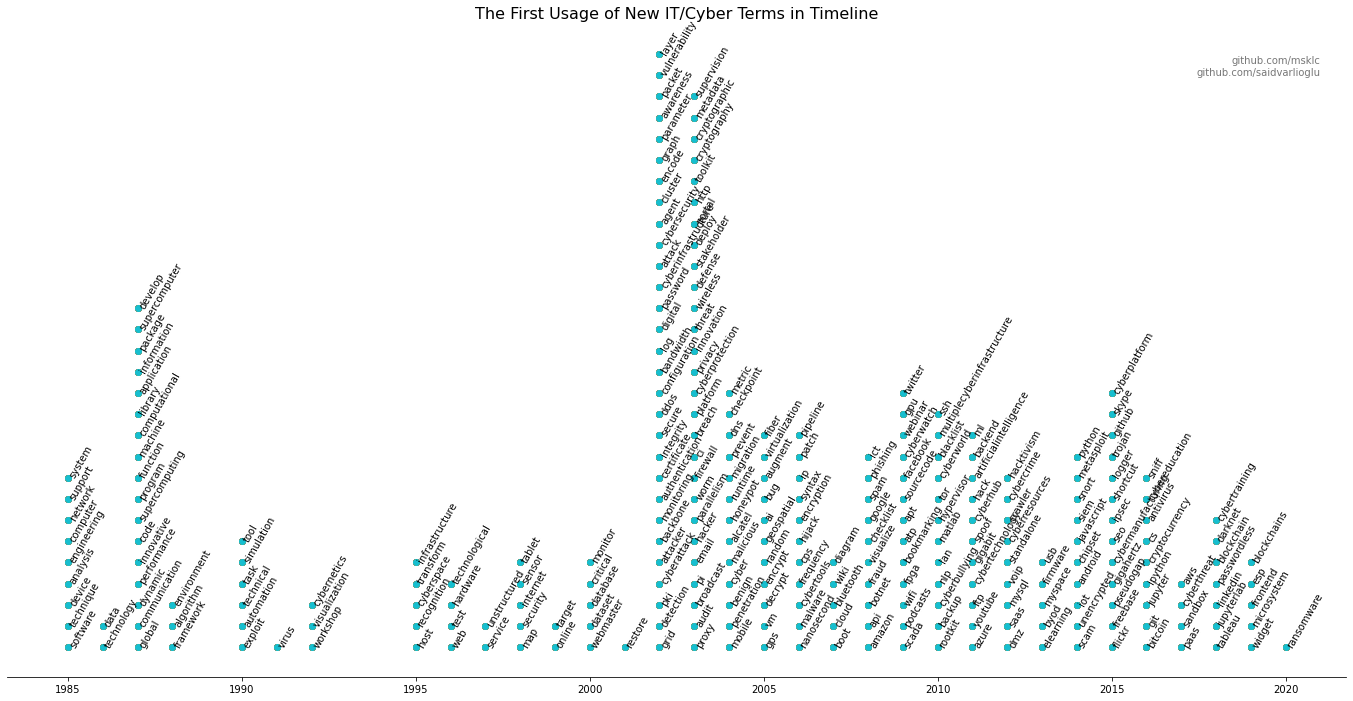

In [23]:
plt.figure(figsize=(24,12))

#Plotting every term in timeline
for n in range(0,df_FreqDist_IT_terms.shape[0]):
    plt.scatter(df_FreqDist_IT_terms['FirstUsedYear'],df_FreqDist_IT_terms['FirstUsedSeq'])
    plt.text(df_FreqDist_IT_terms['FirstUsedYear'][n], 
             df_FreqDist_IT_terms['FirstUsedSeq'][n],
             df_FreqDist_IT_terms.iloc[n:n+1].index[0],
             rotation=60)

# Dejunkifying Plot
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
plt.yticks([]) #disable ythicks

#add signature :)
plt.text(2021, 28, 'github.com/msklc\ngithub.com/saidvarlioglu', ha='right', color='#777777')

#title   
plt.title('The First Usage of New IT/Cyber Terms in Timeline',fontsize=16)

#save and show
plt.savefig('plots/NSF_ITCyber_Terms_FirstUsage.jpeg', bbox_inches='tight', pad_inches=0)
plt.show()

__2.4) Changes of IT/Cyber Terms Usage in Abstracts__ 

Demonstrating the changes in usage of IT/Cyber Terms in Abstracts by _Bar Chart Race Plotting_

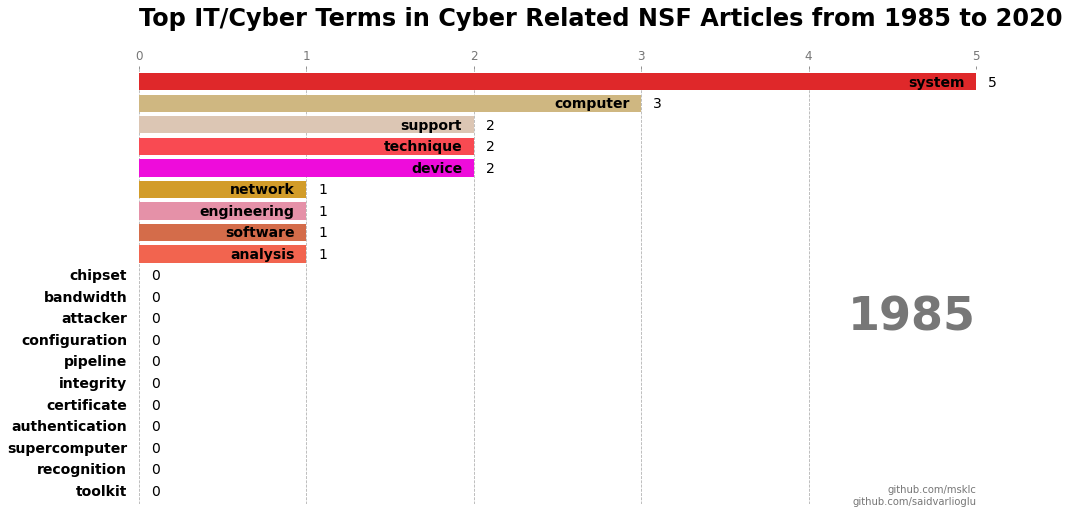

In [26]:
#Define first and last year
year_first=df_sum2['Year'].min()
year_last=df_sum2['Year'].max()

#create a colormap dict for every words
colors_code_list = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0xCCCCCC, 0xFFFFFF),range(n)))
token_color_dict = dict(zip(list(df_FreqDist_IT_terms_yearly_tot.sort_values(by=year_last, ascending=False).index),
                            colors_code_list(df_FreqDist_IT_terms_yearly_tot.shape[0])))

#create a function to create a bar chart for every year
def draw_barchart(year):
    dff = df_FreqDist_IT_terms_yearly_tot.sort_values(by=year, ascending=True).tail(20)
    ax.clear()
    ax.barh(dff.index, dff[year], color=[token_color_dict[x] for x in dff.index])
    for i, (value, name) in enumerate(zip(dff[year], dff.index)):
        ax.text(value - 0.07,i,name,size=14, weight=600, ha='right',va='center') # freq number of common word
        ax.text(value + 0.07, i,f'{value:,.0f}',size=14, ha='left',va='center') #common word
    
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800) #display year
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='--')
    ax.set_axisbelow(True)
    ax.text(0, 1.1, 'Top IT/Cyber Terms in Cyber Related NSF Articles from 1985 to 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'github.com/msklc\ngithub.com/saidvarlioglu', transform=ax.transAxes, ha='right', color='#777777') #add signature :)  
    plt.box(False)

#merge bar plots with animation() function
fig, ax = plt.subplots(figsize=(15, 8))
animator = FuncAnimation(fig, draw_barchart, frames=range(1985, 2021), interval=300,repeat=False)
animator.save('data/NSF_ITCyber_Terms_Usage_Changes.gif', writer='pillow')
HTML(animator.to_jshtml())

__2.5) Compare Of Some IT/Cyber Terms Usage by Yearly__ 

In [27]:
def FreqDist_Change(terms_list):
    plt.figure(figsize=(10,6))
    for term in terms_list:
        try:
            #Usage number of term by yearly
            plt.plot(df_FreqDist_IT_terms_yearly_tot.columns,
                    df_FreqDist_IT_terms_yearly_tot[df_FreqDist_IT_terms_yearly_tot.index==term].values[0],
                    label=term)
            plt.text(2020, 
                     df_FreqDist_IT_terms_yearly_tot[df_FreqDist_IT_terms_yearly_tot.index==term][2020][0],
                     df_FreqDist_IT_terms_yearly_tot[df_FreqDist_IT_terms_yearly_tot.index==term][2020][0])
            
            #First usage year of term
            plt.plot(df_FreqDist_IT_terms[df_FreqDist_IT_terms.index==term]['FirstUsedYear'][0],
                     df_FreqDist_IT_terms[df_FreqDist_IT_terms.index==term]['FirstUsedNum'][0],"o",color='#BAC964')
            plt.text(df_FreqDist_IT_terms[df_FreqDist_IT_terms.index==term]['FirstUsedYear'][0],
                     df_FreqDist_IT_terms[df_FreqDist_IT_terms.index==term]['FirstUsedNum'][0],
                     df_FreqDist_IT_terms[df_FreqDist_IT_terms.index==term]['FirstUsedYear'][0],
                     rotation=30)
            # Dejunkifying Plot
            [plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
            plt.yticks([]) #disable ythicks
            

        except:
            plt.plot(df_FreqDist_IT_terms_yearly_tot.columns,
                     np.zeros(len(df_FreqDist_IT_terms_yearly_tot.columns)),
                     label=term)
            plt.text(2020,0,0)
            # Dejunkifying Plot
            [plt.gca().spines[loc].set_visible(False) for loc in ['top', 'left','right']] #Remove top, left and right frame
            plt.yticks([]) #disable ythicks
    
    #add legend
    plt.legend(loc="upper left")
    
    #title
    plt.title('Compare Of \n{} Terms Usage\nin NSF Articles'.format(terms_list))

    #add signature :)
    ax.text(1985,0.5 , 'github.com/msklc\ngithub.com/saidvarlioglu', transform=ax.transAxes, ha='right', color='#777777')   

    #save with last term
    plt.savefig(r'plots/NSF_ITCyber_Terms_Compare{}.jpeg'.format(term), bbox_inches='tight', pad_inches=0)
    
    return plt.show()

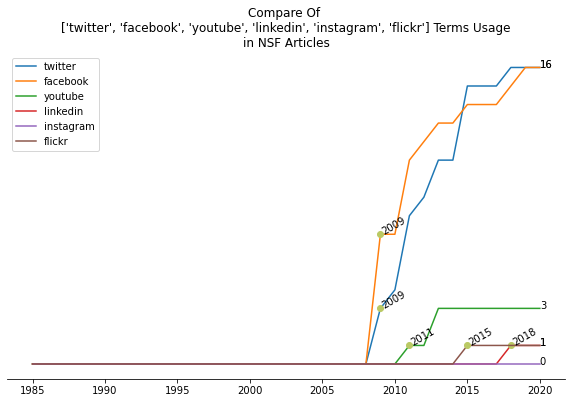

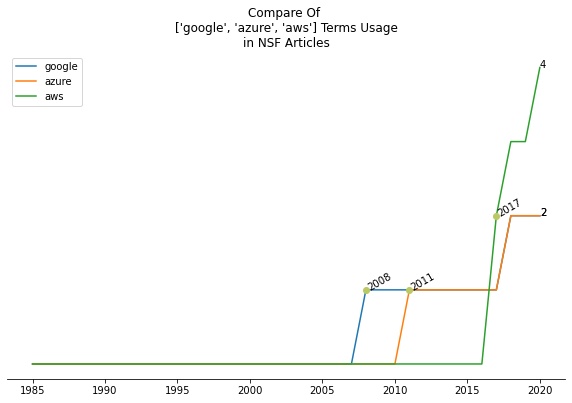

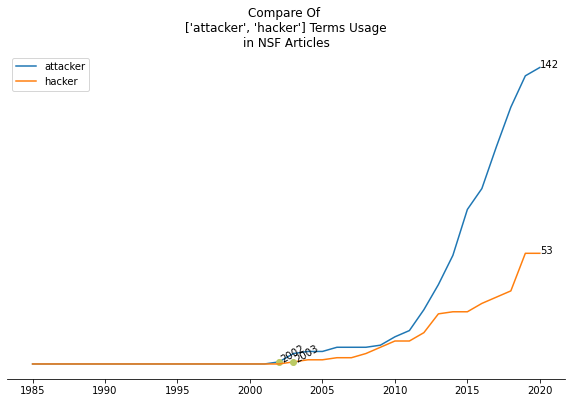

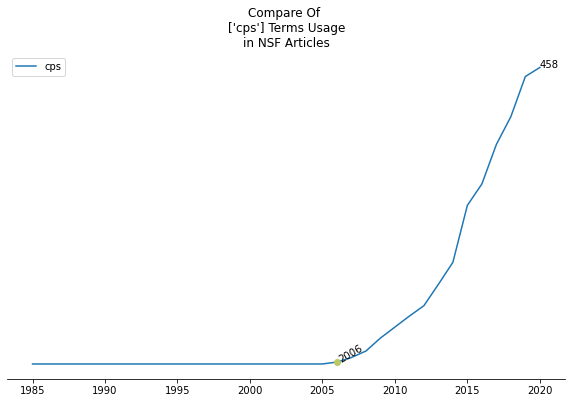

In [28]:
compare_term_list=[['twitter','facebook','youtube','linkedin','instagram','flickr'],
                   ['google','azure','aws'],
                   ['attacker','hacker'],
                   ['cps']]

for terms_list in compare_term_list:
    FreqDist_Change(terms_list)

That is all!!!